In [1]:
%pylab inline
plt.style.use('dark_background')
pylab.rcParams['figure.figsize'] = (10.0, 6.0)
'''
pylab is a magic function in ipython.

Magic functions in ipython always begin with the percent sign (%) followed without any spaces by a small text string;
in essence, ipython magic functions define shortcuts particularly useful for interactive work,
'''

Populating the interactive namespace from numpy and matplotlib


'\npylab is a magic function in ipython.\n\nMagic functions in ipython always begin with the percent sign (%) followed without any spaces by a small text string;\nin essence, ipython magic functions define shortcuts particularly useful for interactive work,\n'

# Free-Fall Position Update 

Time (delta_t=0.5) :  [0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.030000000000000002, 0.035, 0.04, 0.045, 0.049999999999999996, 0.05499999999999999, 0.05999999999999999, 0.06499999999999999, 0.06999999999999999, 0.075, 0.08, 0.085, 0.09000000000000001, 0.09500000000000001, 0.10000000000000002]
Z positon at time t:  [10.0, 9.951, 9.853, 9.706, 9.51, 9.265, 8.971, 8.628, 8.236, 7.795000000000001, 7.305000000000001, 6.766000000000001, 6.178000000000001, 5.541000000000001, 4.855000000000001, 4.120000000000001, 3.336000000000001, 2.503000000000001, 1.6210000000000009, 0.6900000000000007, -0.2899999999999996]


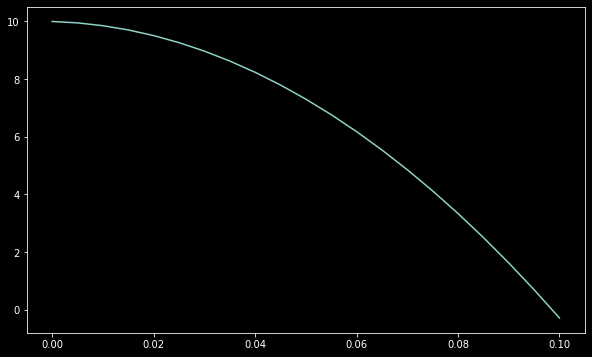

In [2]:
#import time
import numpy as np

'''
Free-Fall Position Update
'''
z_positions = []
time_intervals = []

pose = np.ndarray((3,), dtype=float, buffer=np.array([0.0, 0.0, 10.0]))
velocity = np.ndarray((3,), dtype=float, buffer=np.array([0.0, 0.0, 0.0]))
delta_t = .005
g = -9.8
t = 0
i = 0
#print(pose[2])

while pose[2] > 0:
    dz_dt = g*t
    pose = pose + [0,0,dz_dt]
    z_positions.append(pose[2])
    time_intervals.append((t))
    t = t + delta_t


import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation



print("Time (delta_t=0.5) : ", time_intervals)
print("Z positon at time t: ",z_positions)
plt.plot(time_intervals,z_positions)

plt.show()

In [3]:
!pip install JSAnimation

You should consider upgrading via the 'c:\users\rbd218\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


### Running the simulator

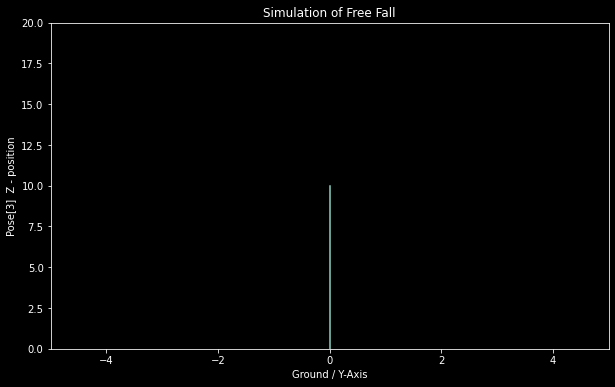

In [5]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML

fig, ax = plt.subplots()
ax.set_xlim(-5, 5)
ax.set_ylim(0, 20)
line, = ax.plot(0, 0)

x_data = []
y_data = []
def animation_frame(i):
	x_data.append(0)
	y_data.append(z_positions[i])

	line.set_xdata(x_data)
	line.set_ydata(y_data)
	return line,

# interval is time delay (ie every 10 miliseconds )
animation = FuncAnimation(fig, func=animation_frame, frames=np.arange(0, len(time_intervals), 1), interval=5)
plt.title('Simulation of Free Fall')
plt.xlabel('Ground / Y-Axis')
plt.ylabel('Pose[3]  Z - position')

HTML(animation.to_jshtml())